In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

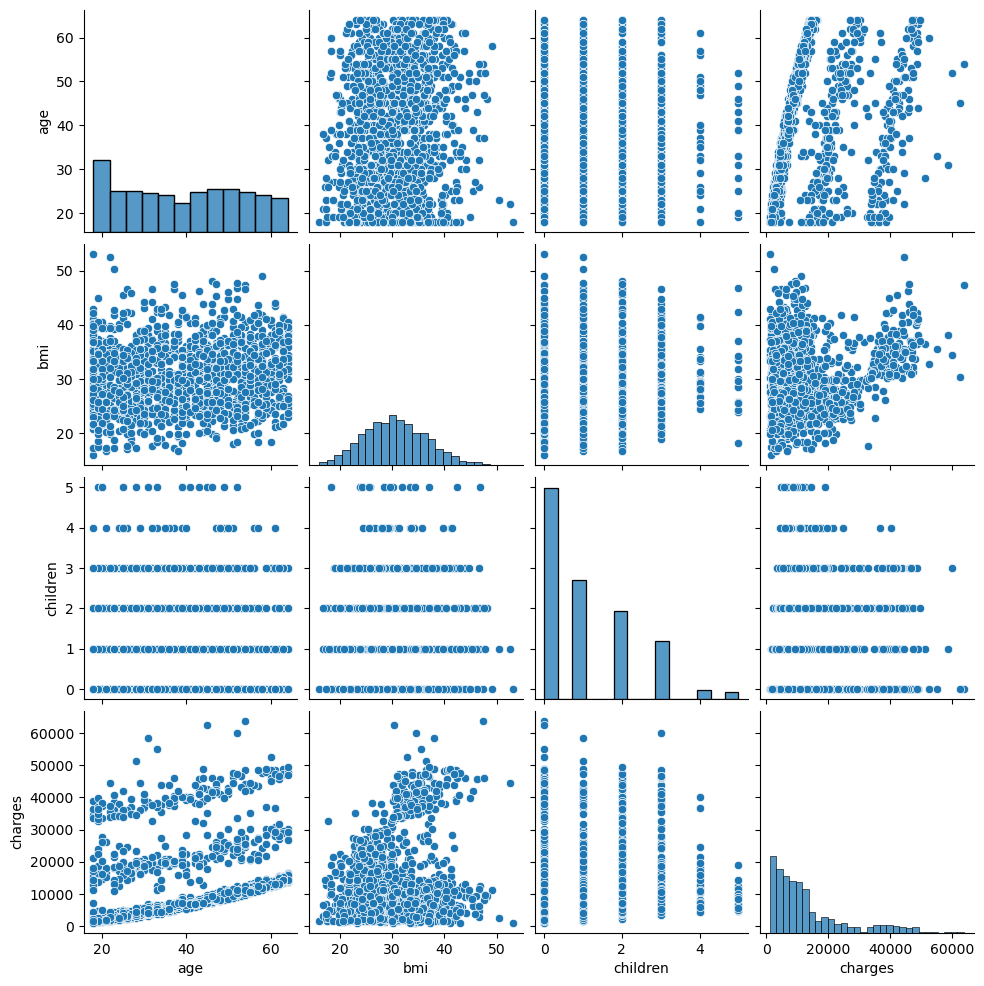

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
numeric_cols=["age","bmi","children","charges"]
categoric_cols=["sex","smoker","region"]

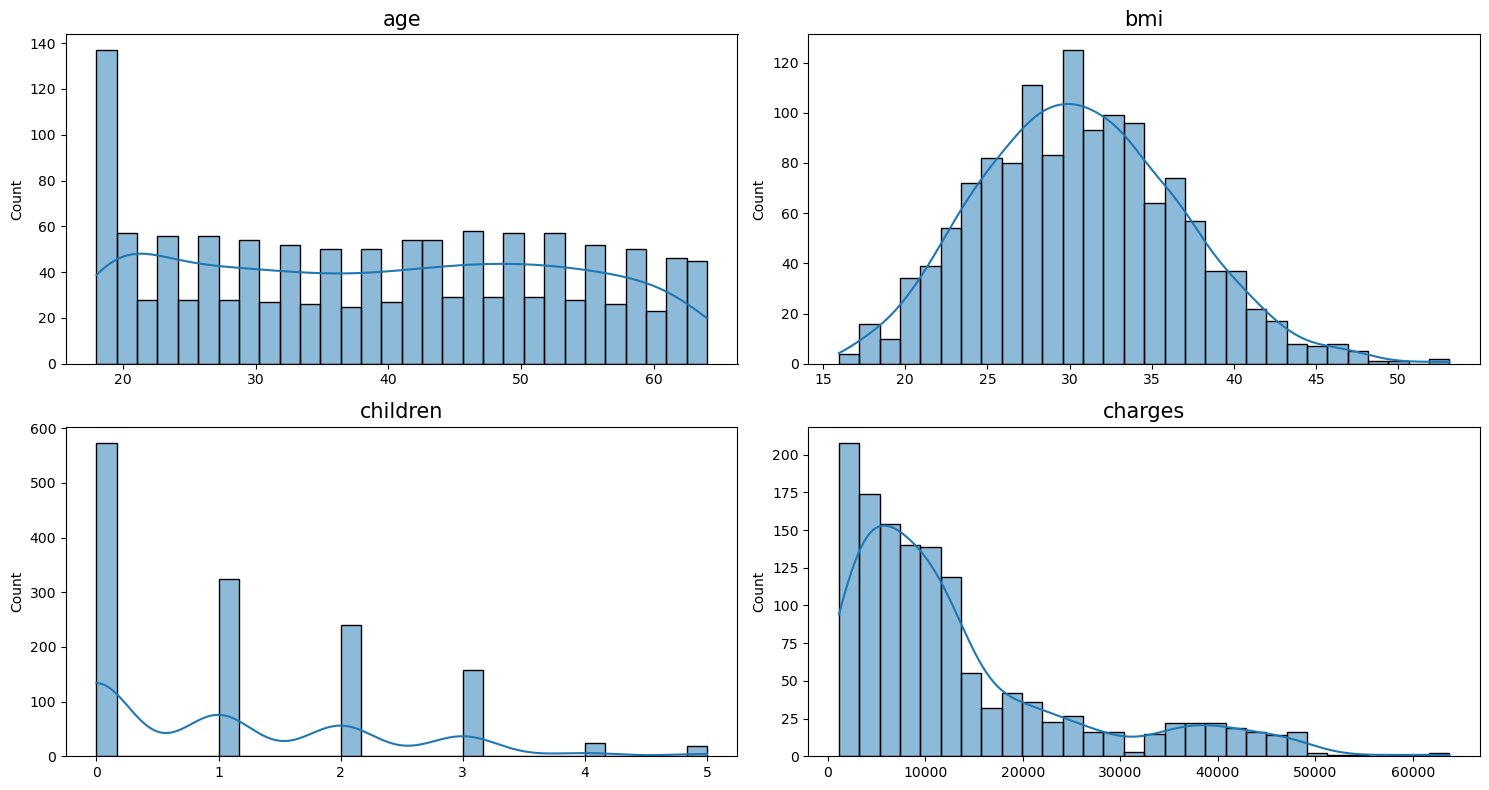

In [11]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
for i,col in enumerate(numeric_cols):
    rows=i//2
    cols=i%2
    ax=axes[rows,cols]
    sns.histplot(data=df,x=col,ax=ax,kde=True,bins=30)
    ax.set_title(col,fontsize=15)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [12]:
dictionary={}
def unique_func():
    for cols in categoric_cols:
        uniques=df[cols].unique()
        dictionary[cols]=uniques
    return dictionary
    

In [13]:
unique_func()

{'sex': array(['female', 'male'], dtype=object),
 'smoker': array(['yes', 'no'], dtype=object),
 'region': array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)}

In [14]:
df=pd.get_dummies(data=df,columns=["sex","smoker"],drop_first=True)

In [15]:
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,False,True
1,18,33.770,1,southeast,1725.55230,True,False
2,28,33.000,3,southeast,4449.46200,True,False
3,33,22.705,0,northwest,21984.47061,True,False
4,32,28.880,0,northwest,3866.85520,True,False


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
scaler=LabelEncoder()

In [18]:
df["region"]=scaler.fit_transform(df["region"])

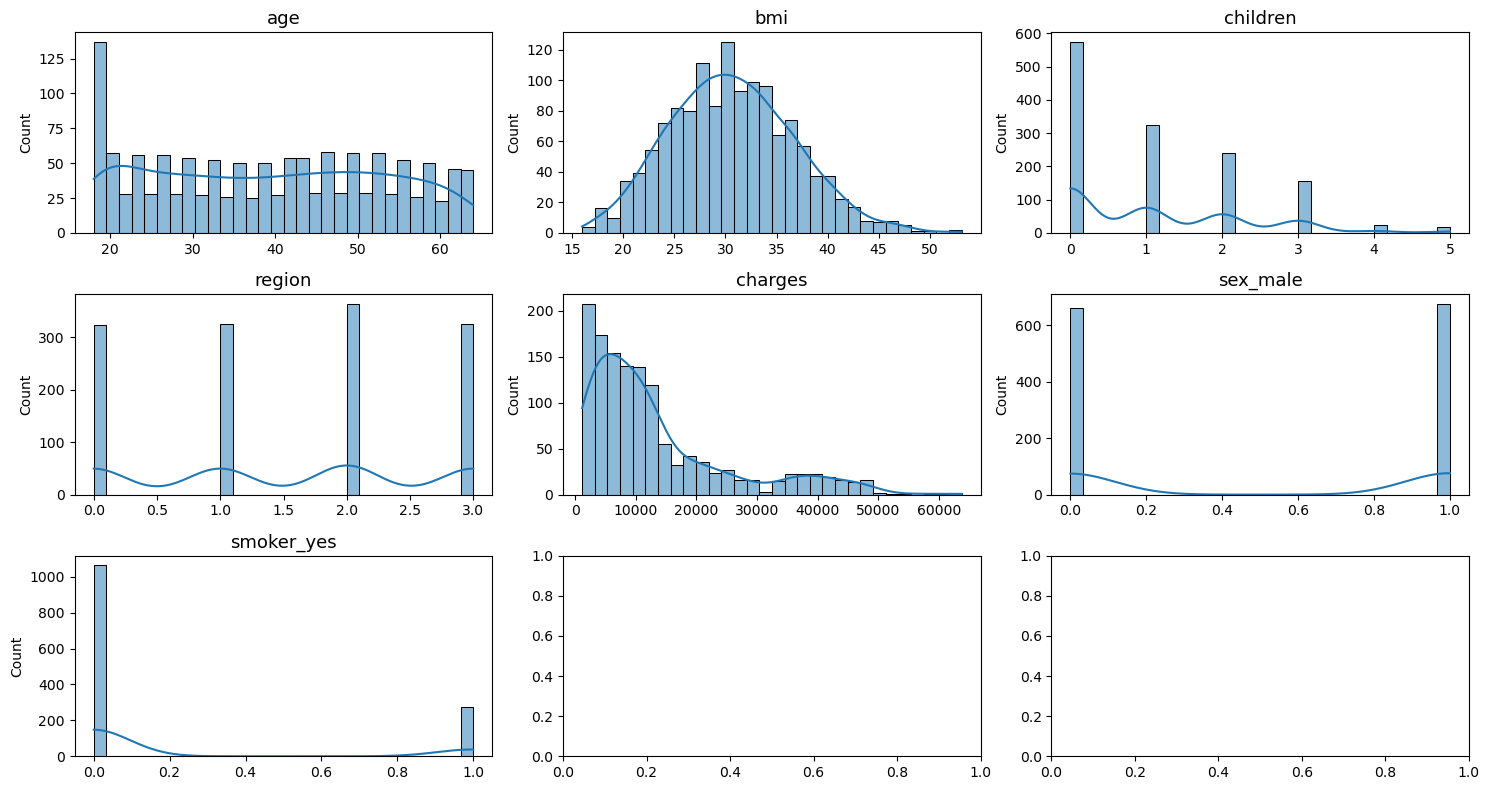

In [19]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,8))
for i,col in enumerate(df.columns):
    rows=i//3
    cols=i%3
    ax=axes[rows,cols]
    sns.histplot(data=df,x=col,ax=ax,kde=True,bins=30)
    ax.set_title(col,fontsize=13)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   region      1338 non-null   int32  
 4   charges     1338 non-null   float64
 5   sex_male    1338 non-null   bool   
 6   smoker_yes  1338 non-null   bool   
dtypes: bool(2), float64(2), int32(1), int64(2)
memory usage: 49.8 KB


In [21]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew,boxcox
from sklearn.model_selection import train_test_split

In [22]:
skews=df.apply(skew).sort_values(ascending=False)
print(skews)

charges       1.514180
smoker_yes    1.463124
children      0.937328
bmi           0.283729
age           0.055610
sex_male     -0.020928
region       -0.038058
dtype: float64


In [23]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=14)

In [25]:
pt=PowerTransformer()

In [26]:
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)

In [27]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)

In [28]:
X_train_transformed.head()

,age,bmi,children,region,sex_male,smoker_yes
0,-0.432106,0.206557,0.307082,-1.417159,-1.020777,-0.505835
1,-0.662485,0.299768,0.955606,-0.374073,-1.020777,-0.505835
2,-1.421880,-0.116732,-1.065381,1.306008,-1.020777,-0.505835
3,0.604874,-0.636762,0.955606,-1.417159,-1.020777,-0.505835
4,0.604874,0.945601,-1.065381,0.510639,0.979646,1.976931


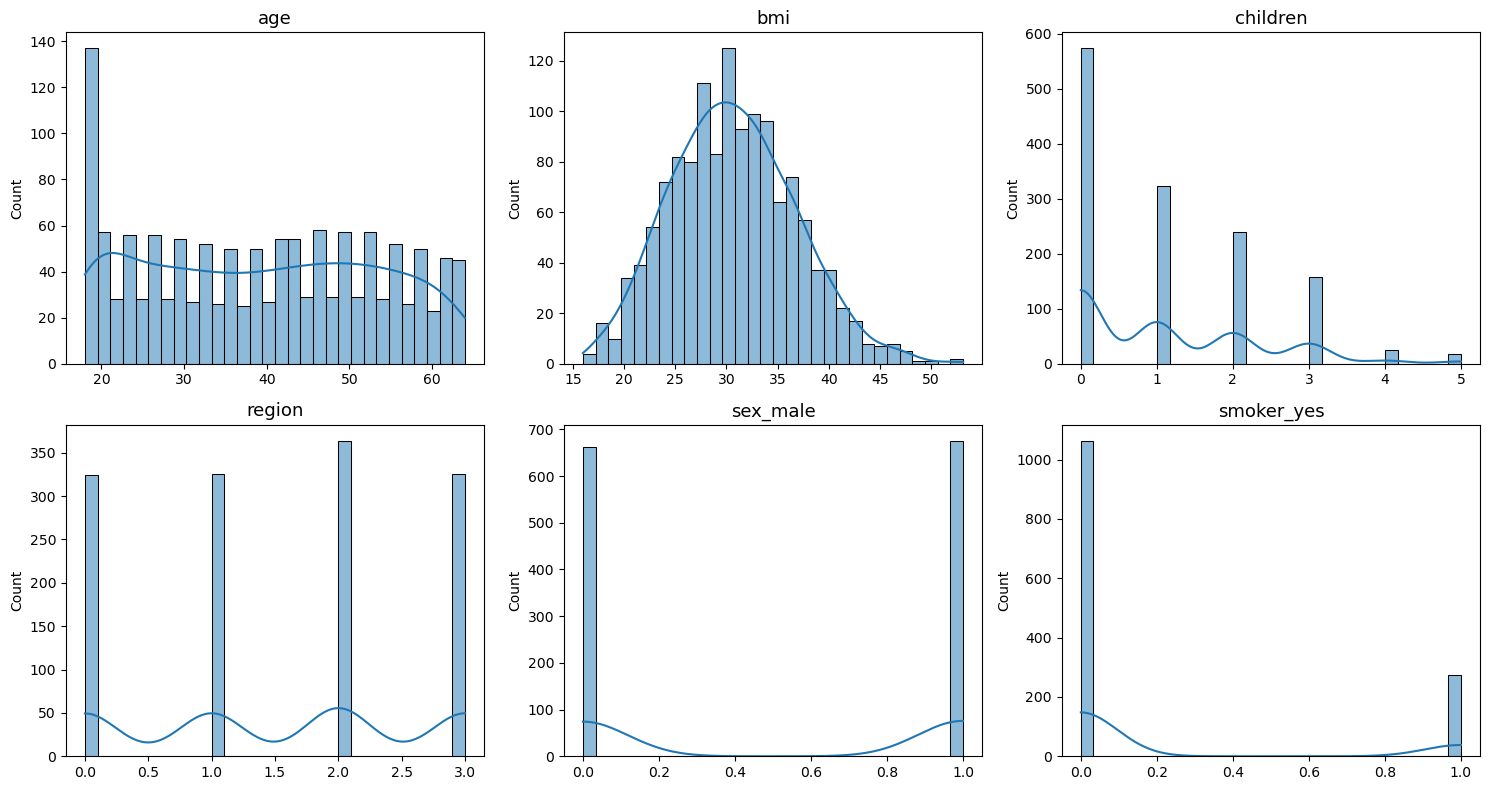

In [29]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,8))
for i,col in enumerate(X_train_transformed.columns):
    rows=i//3
    cols=i%3
    ax=axes[rows,cols]
    sns.histplot(data=df,x=col,ax=ax,kde=True,bins=30)
    ax.set_title(col,fontsize=13)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [30]:
y_train_transformed,lambda_y=boxcox(y_train)

In [31]:
y_train_transformed

array([ 9.87248881,  9.81312726,  8.55580108, ...,  9.59878359,
        8.28346838, 10.85571123])

In [32]:
lambda_y

0.032978693260169285

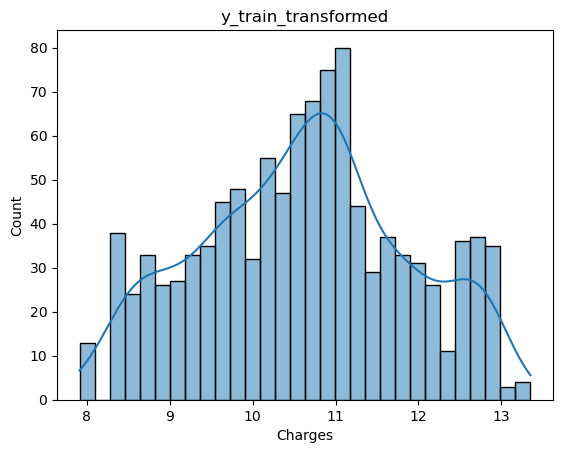

In [33]:
sns.histplot(x=y_train_transformed,kde=True,bins=30)
plt.title("y_train_transformed")
plt.xlabel("Charges")
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [35]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(),
    "LightGBMRegressor":LGBMRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeightborsRegressor":KNeighborsRegressor(),
    }

In [36]:
def calculate_metrics(true,predict):
    mse=mean_squared_error(true,predict)
    mae=mean_absolute_error(true,predict)
    rmse=np.sqrt(mean_squared_error(true,predict))
    R2_score=r2_score(true,predict)
    return mse,mae,rmse,R2_score
    

In [37]:
def inverse_boxcox(y,lambda_y):
    if lambda_y==0:
        return np.exp(y)
    else:
        return np.power(y*lambda_y+1,1/lambda_y)

In [47]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_transformed,y_train_transformed)
    
    y_pred=model.predict(X_test_transformed)
    
    y_pred_original=inverse_boxcox(y_pred,lambda_y)
    
    mse,mae,rmse,R2_score=calculate_metrics(y_test,y_pred_original)
    
    print(list(models.keys())[i])
    print("Model performance ")
    print("Root Mean Squared Error: ",rmse)
    print("Mean Absolute Error: ",mae)
    print("Mean Squared Error:",mse)
    print("R2 Score: ",R2_score)
    
    print("\n")
    
    

LinearRegression
Model performance 
Root Mean Squared Error:  8293.17102786921
Mean Absolute Error:  4422.151059179345
Mean Squared Error: 68776685.69748926
R2 Score:  0.5057161679802898


DecisionTreeRegressor
Model performance 
Root Mean Squared Error:  6191.657953134497
Mean Absolute Error:  2680.7231864976097
Mean Squared Error: 38336628.20861367
R2 Score:  0.724482572757061


XGBRegressor
Model performance 
Root Mean Squared Error:  8611.012969242342
Mean Absolute Error:  3241.4607096087925
Mean Squared Error: 74149544.35645981
R2 Score:  0.4671025427390667


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 10.613725
LightGBMRegressor
Model performance 
Root Mean Squared Error:  4598.080509116505
Mean Abs

In [39]:
# I will select Algorithm which have the highest r2_score 

In [43]:
params_model={
    "loss":["squared_error","absolute_error","huber","quantile"],
    "learning_rate":[0.1,0.01,0.001,1],
    "n_estimators":[50,100,150,200,250],
    "max_depth":[1,2,3,4,5,6,7,8,9,10],
    
}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=params_model,n_jobs=-1,cv=5)

In [46]:
# I could not run these code because of my cpu (it is soo slow and ı have no much time)
#if you want run codes on your own pc ı will write downside

In [ ]:
grid.fit(X_train_transformed,y_train_transformed)

In [ ]:
y_pred=gird.predict(X_test_transformed)

In [ ]:
y_pred_original=inverse_boxcox(y_pred,lambda_y)

In [ ]:
mse,mae,rmse,R2_score=calculate_metrics(y_test,y_pred_original)

In [ ]:
    print("Performance of GradientBoostingRegressor ")
    print("Root Mean Squared Error: ",rmse)
    print("Mean Absolute Error: ",mae)
    print("Mean Squared Error:",mse)
    print("R2 Score: ",R2_score)